# Convolutional Neural Network (CNN) 
---
*dataset: CIFAR10*



---
Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

Importing dataset

In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Each pixel has a value between 0–255. We normalize the values to 0–1.
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

print("X_train.shape: ", X_train.shape)
print("Train set contains ", X_train.shape[0], " images of dimension ", X_train.shape[1], "x", X_train.shape[2])
print("X_test.shape: ", X_test.shape)
print("Test set contains ", X_test.shape[0], " images of dimension ", X_test.shape[1], "x", X_test.shape[2])

# the data is only 2D!
# convolution expects height x width x color

170500096/170498071 [==============================] - 2s 0us/step
X_train.shape:  (50000, 32, 32, 3)
Train set contains  50000  images of dimension  32 x 32
X_test.shape:  (10000, 32, 32, 3)
Test set contains  10000  images of dimension  32 x 32


Checking number of classes data contain

In [3]:
print("Shape of y_train ", y_train.shape)

K = len(set(y_train))
print("number of classes:", K)
# Class Names: T-shirt/top, Trouser/pants, Pullover shirt, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot

Shape of y_train  (50000,)
number of classes: 10


Build the model using the functional API

In [4]:
# Entry block
input = tf.keras.layers.Input(shape = X_train[0].shape) # layers.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation='relu')(input)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(K, activation='softmax')(x)

model = tf.keras.models.Model(input, x)

Compiling the model

In [5]:
# Note: make sure you are using the GPU for this!
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Training the model

In [6]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 41s 7ms/step - loss: 1.7336 - accuracy: 0.3550 - val_loss: 1.2500 - val_accuracy: 0.5488
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2436 - accuracy: 0.5528 - val_loss: 1.1055 - val_accuracy: 0.5980
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0689 - accuracy: 0.6162 - val_loss: 0.9979 - val_accuracy: 0.6419
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9416 - accuracy: 0.6621 - val_loss: 0.9305 - val_accuracy: 0.6735
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8461 - accuracy: 0.6999 - val_loss: 0.9032 - val_accuracy: 0.6804
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7656 - accuracy: 0.7270 - val_loss: 0.8995 - val_accuracy: 0.6839
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7019 - accuracy: 0.7527 - val_loss: 0.8680 - val_ac

Plotting the loss per iteration

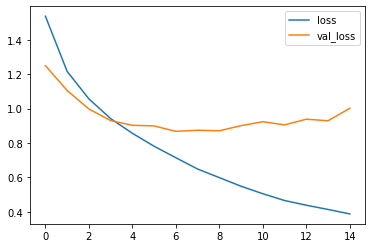

In [7]:
# val_loss is the value of cost function for your cross-validation data
# and loss is the value of cost function for your training data.
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Also plotting the accuracy per iteration

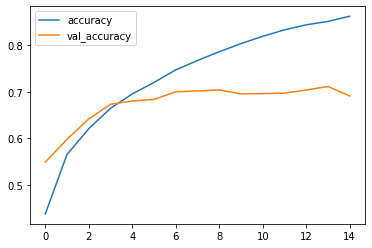

In [8]:
# accuracy refers to accuracy of what was trained against.
# 'val_accuracy' refers to validation set.
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

Evaluating the model

In [9]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 4ms/step - loss: 1.0019 - accuracy: 0.6914
[1.0019396543502808, 0.6913999915122986]


Creating Confusion Matrix

Confusion matrix, without normalization
[[745  31  39  24  22  11  13  14  51  50]
 [ 13 802   8  10   3   6  12   5  16 125]
 [ 49   7 514  87  78 101 114  28  10  12]
 [ 22  12  46 509  50 214  89  29   7  22]
 [ 14   4  52  93 567  42 142  68  10   8]
 [  8   7  32 214  42 617  40  28   4   8]
 [  2   7  18  63  16  24 855   5   7   3]
 [  8   3  24  51  61  87  18 719   7  22]
 [ 80  43  11  18   7  10  10   8 764  49]
 [ 23  78   7  15   2  11  15  15  12 822]]


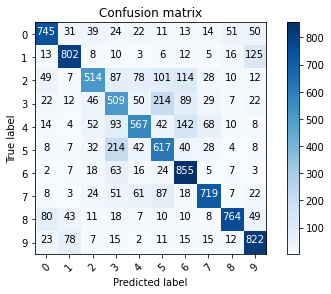

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, list(range(10))) # for 10 nodes as we have 0 to 9 digits.

Label mapping

In [11]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Predicting for single image

In [12]:
from keras.preprocessing import image
test_image = image.load_img('cifar_test_airplane.png', color_mode="rgb", target_size=(32,32,3))
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

classname = result[0]
max_value = max(classname)
max_index = np.where(classname == max_value)

print("Predicted value: ", labels[max_index[0][0]])

Predicted value:  airplane


Misclassified examples

Text(0.5, 1.0, 'True label: airplane Predicted: truck')

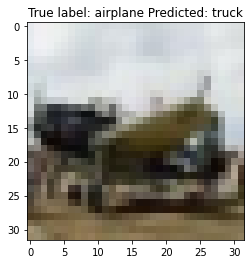

In [13]:
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_pred[i]]))